In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

plot


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
features = df_market_data.columns # Select all columns for scaling

scaler = StandardScaler() # Create a scaler object

# fit and transform the data
scaled_data = scaler.fit_transform(df_market_data[features])

In [6]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=features, index=df_market_data.index)

# Copy the crypto names from the original data
# 'coin_id is already the index

# Set the coinid column as index
# This step is already taken care of by using 'index=df_market_data.index' when creating the DataFrame

# Display sample data
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data
    model.fit(scaled_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_original = pd.DataFrame(elbow_data)

print(elbow_df_original.head())

   k     inertia
0  1  287.007838
1  2  198.675508
2  3  111.972027
3  4   43.205879
4  5   34.505578


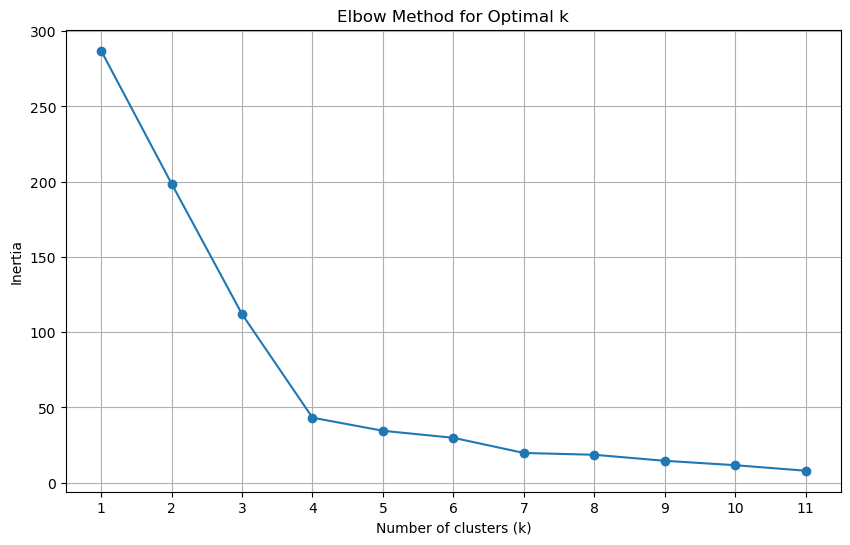

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, '-o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** the best value for k appears to be 4. This conclusion is drawn from the significant drop in intertia when increasing the number of clusters from 3 to 4, followed by a more modest decrease in inertia when increasing the number of clusters from 4 to 5. This indicates that adding more cluters than 4 does not substantially imporve the model's fit to the data. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_data_df)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [14]:
# Create a copy of the DataFrame
scaled_data_df_copy = scaled_data_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df_copy['Cluster'] = cluster_labels

# Display sample data
print(scaled_data_df_copy.head())   

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas  # Make sure to import hvplot for pandas

# Create the scatter plot
scatter_plot_original = scaled_data_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='Cluster',
    hover_cols=['coin_id'],
    colormap='Category10',  # Use a colormap to distinguish different clusters
    title="Cryptocurrency Clusters: 24h vs 7d Price Change"
)

# Display the plot
scatter_plot_original


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# Fit and transform the scaled data using PCA
pca_data = pca.fit_transform(scaled_data_df_copy)

# Convert this array into a DataFrame for better readablity and analysis. 
pca_data_df = pd.DataFrame(
    pca_data,
    columns = ['PC1', 'PC2', 'PC3'],
    index=scaled_data_df_copy.index
)
# View the first five rows of the DataFrame. 
print(pca_data_df.head(5))

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -1.585139  0.134394  0.545621
ethereum     -1.322581  0.054494  1.115709
tether        0.266335 -0.536409 -0.796946
ripple        0.257225 -0.592013 -0.646529
bitcoin-cash -2.952250  0.422372  1.267894


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_
# Calculate the total explained variance of the three principal components
total_explained_variance = explained_variance.sum()

# Display the total explained variance
print("Total explained variance of the three principal components:", total_explained_variance)


Total explained variance of the three principal components: 0.8844285111826466


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.884 or 88.44%. This means that the three principal components combined capture about 88.44% of the total variation in the dataset. In other words, by reducing the dataset to these three dimensions, we retain a significant majority of the information (as measured by variance) that was present in the original, higher-dimensional dataset. This high percentage of explained variance indicates that the three principal components effectively represent the underlying structure of the data, making them a good summary of the dataset's main characteristics.

In [20]:
# Creating a DataFrame with the PCA data
pca_df_with_names = pca_data_df.copy()

# Set the coin_id column from the original data as index of the new DataFrame
pca_df_with_names.index = df_market_data.index

# Now pca_df_with_names has the PCA data with the cryptocurrency names as the index
# Display sample data
print(pca_df_with_names.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -1.585139  0.134394  0.545621
ethereum     -1.322581  0.054494  1.115709
tether        0.266335 -0.536409 -0.796946
ripple        0.257225 -0.592013 -0.646529
bitcoin-cash -2.952250  0.422372  1.267894


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [22]:
from sklearn.cluster import KMeans

#Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `pca_df_with_names`
    model.fit(pca_df_with_names)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Print the inertia values to check them
print(inertia_values)


[287.00783759231985, 198.6755078870047, 111.97202664282966, 43.20587871955299, 34.50557792364347, 29.83846069881802, 19.77731971115921, 18.56036839692317, 14.5677438396426, 11.634955754884842, 7.970250079411331]


c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [42]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data)

print(elbow_df_pca)

    k_values     inertia
0          1  287.007838
1          2  198.675508
2          3  111.972027
3          4   43.205879
4          5   34.505578
5          6   29.838461
6          7   19.777320
7          8   18.560368
8          9   14.567744
9         10   11.634956
10        11    7.970250


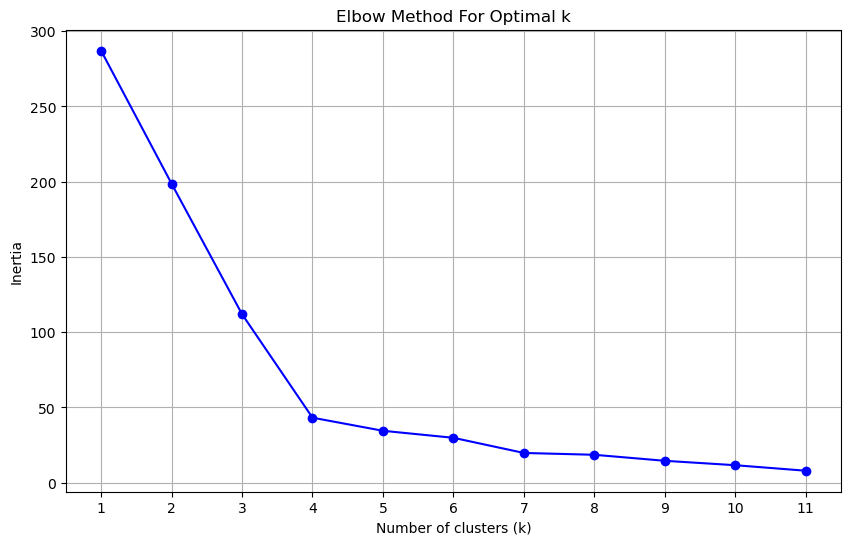

In [43]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


# Plotting the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(elbow_df_pca['k_values'], elbow_df_pca['inertia'], marker='o', linestyle='-', color='b')  # Line plot
plt.title('Elbow Method For Optimal k')  # Title of the plot
plt.xlabel('Number of clusters (k)')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.xticks(k_values)  # Set x-ticks to be the k-values
plt.grid(True)  # Turn the grid on for easier visualization
plt.show()  # Display the plot


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best k value found using the PCA data is 4. This is because there is a noticeable change in the rate of decrease in inertia after k = 4; the line starts to flatten out, suggesting that adding more clusters beyond this point does not yield a significant decrease in inertia, which means that additional clusters are not contributing as much to explaining the variance within the data. 

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Given that the original data also suggested k = 4 as the optimal number of clusters, the conclusion drawn from both the original and the PCA-transformed data is consistent. The best value for k when using the PCA data is 4, which does not differ from the best k value found using the original data. This consistency implies that the PCA transformation preserved the underlying structure of the data while reducing its dimensionality. The fact that PCA did not alter the optimal number of clusters suggests that the most significant variance within the data, which dictates the clustering, is captured within the first three principle components. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [34]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [35]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df_with_names)

c:\Users\lenar\anaconda3\envs\Dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [36]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_pca.labels_
# Print the resulting array of cluster values.
print(cluster_labels_pca)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [37]:
# Create a copy of the DataFrame with the PCA data
pca_clusters_df = pca_df_with_names.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clusters_df['cluster'] = cluster_labels_pca

# Display sample data
print(pca_clusters_df.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -1.585139  0.134394  0.545621        0
ethereum     -1.322581  0.054494  1.115709        0
tether        0.266335 -0.536409 -0.796946        1
ripple        0.257225 -0.592013 -0.646529        1
bitcoin-cash -2.952250  0.422372  1.267894        0


In [38]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot using hvPlot
scatter_plot_pca = pca_clusters_df.hvplot.scatter(
    x="PC1",  # First principal component for x-axis
    y="PC2",  # Second principal component for y-axis
    by='cluster',  # Color by the predicted clusters
    hover_cols=['coin_id'],  # Assuming 'coin_id' is the column with the cryptocurrency names
    colormap='Category10',  # Use a colormap to distinguish clusters
    title="PCA Cluster Plot: PC1 vs PC2"
)

# Display the scatter plot
scatter_plot_pca


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [49]:
print(elbow_df_original.columns)
print(elbow_df_pca.columns)


Index(['k', 'inertia'], dtype='object')
Index(['k_values', 'inertia'], dtype='object')


In [53]:
import hvplot.pandas

# Plot for original data
elbow_plot_original = elbow_df_original.hvplot.line(
    x='k', 
    y='inertia',
    title='Elbow Curve Original Data',
    xlabel='Number of clusters (k)',
    ylabel='Inertia'
)

# Plot for PCA data
elbow_plot_pca = elbow_df_pca.hvplot.line(
    x='k_values',  
    y='inertia',
    title='Elbow Curve PCA Data',
    xlabel='Number of clusters (k)',
    ylabel='Inertia'
)

# Create a composite plot
composite_elbow_plot = elbow_plot_original + elbow_plot_pca

# Display the composite plot
composite_elbow_plot


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k_values]   (inertia)

In [52]:
# Composite plot to contrast the clusters
composite_scatter_plot = scatter_plot_original + scatter_plot_pca
composite_scatter_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Based of visual analysis, using fewer features (such as after PCA) often results in a simplified representation of the data that may capture the most significant relationships and variations within the data while discarding noise and less informative features. This can sometimes lead to clearer cluster separation because the variance explaned by the prinicipal components can highlight the underlying structure of the data more effectively. This can also result in a more interpretable model because the features used to train the model are more directly related to the features that are used to make predictions.